# MAD1 family - scRNAseq from PBMCs

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc

In [2]:
sc.logging.print_header()
sc.settings.verbosity = 3  

scanpy==1.7.2 anndata==0.7.6 umap==0.4.6 numpy==1.20.0 scipy==1.6.2 pandas==1.2.5 scikit-learn==0.22.1 statsmodels==0.12.2 python-igraph==0.9.4 louvain==0.7.0 leidenalg==0.8.3


In [3]:
# This does not work
sc.settings.set_figure_params(ipython_format="retina")

In [43]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#### August 18, 2021

## Read individual .h5 files from 10xGenomics

In [32]:
# Hija
P = "/Users/mmm/BioPROJECTS/MAD1 & MVA/scRNAseq PBMCs/hija/"
ad_hija = sc.read_10x_h5(P + "filtered_feature_bc_matrix.h5")

reading /Users/mmm/BioPROJECTS/MAD1 & MVA/scRNAseq PBMCs/hija/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [45]:
ad_hija.var[ad_hija.var.index.duplicated()]

gene_ids    feature_types  genome
TBCE            ENSG00000284770  Gene Expression  GRCh38
LINC01238       ENSG00000261186  Gene Expression  GRCh38
CYB561D2        ENSG00000271858  Gene Expression  GRCh38
MATR3           ENSG00000015479  Gene Expression  GRCh38
LINC01505       ENSG00000234229  Gene Expression  GRCh38
HSPA14          ENSG00000187522  Gene Expression  GRCh38
GOLGA8M         ENSG00000261480  Gene Expression  GRCh38
GGT1            ENSG00000100031  Gene Expression  GRCh38
ARMCX5-GPRASP2  ENSG00000286237  Gene Expression  GRCh38
TMSB15B         ENSG00000269226  Gene Expression  GRCh38

In [55]:
# using the default does not work: use join="_"
ad_hija.var_names_make_unique(join="_")

In [56]:
ad_hija.var[ad_hija.var.index.duplicated()]

Empty DataFrame
Columns: [gene_ids, feature_types, genome]
Index: []

In [57]:
ad_hija.var.index.is_unique

True

In [54]:
ad_hija.var.loc["TBCE",:]

gene_ids    feature_types  genome
TBCE  ENSG00000285053  Gene Expression  GRCh38
TBCE  ENSG00000284770  Gene Expression  GRCh38

## Read the final files

In [30]:
# Hija
P = "/Users/mmm/BioPROJECTS/MAD1 & MVA/scRNAseq PBMCs/data/original_from_10x/hija/"
ad_hija = sc.read_10x_h5(P + "filtered_feature_bc_matrix.h5")
ad_hija.var_names_make_unique(join="_")
ad_hija.obs["Sample"] = "Proband"
ad_hija

reading /Users/mmm/BioPROJECTS/MAD1 & MVA/scRNAseq PBMCs/data/original_from_10x/hija/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 6754 × 36601
    obs: 'Sample'
    var: 'gene_ids', 'feature_types', 'genome'

In [32]:
# Madre
P = "/Users/mmm/BioPROJECTS/MAD1 & MVA/scRNAseq PBMCs/data/original_from_10x/madre/"
ad_madre = sc.read_10x_h5(P + "filtered_feature_bc_matrix.h5")
ad_madre.var_names_make_unique(join="_")
ad_madre.obs["Sample"] = "Mother"
ad_madre

reading /Users/mmm/BioPROJECTS/MAD1 & MVA/scRNAseq PBMCs/data/original_from_10x/madre/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 6286 × 36601
    obs: 'Sample'
    var: 'gene_ids', 'feature_types', 'genome'

In [33]:
# Padre
P = "/Users/mmm/BioPROJECTS/MAD1 & MVA/scRNAseq PBMCs/data/original_from_10x/padre/"
ad_padre = sc.read_10x_h5(P + "filtered_feature_bc_matrix.h5")
ad_padre.var_names_make_unique(join="_")
ad_padre.obs["Sample"] = "Father"
ad_padre

reading /Users/mmm/BioPROJECTS/MAD1 & MVA/scRNAseq PBMCs/data/original_from_10x/padre/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 9313 × 36601
    obs: 'Sample'
    var: 'gene_ids', 'feature_types', 'genome'

In [34]:
# C1
P = "/Users/mmm/BioPROJECTS/MAD1 & MVA/scRNAseq PBMCs/data/original_from_10x/C1/"
ad_C1 = sc.read_10x_h5(P + "filtered_feature_bc_matrix.h5")
ad_C1.var_names_make_unique(join="_")
ad_C1.obs["Sample"] = "Control1"
ad_C1

reading /Users/mmm/BioPROJECTS/MAD1 & MVA/scRNAseq PBMCs/data/original_from_10x/C1/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 4609 × 36601
    obs: 'Sample'
    var: 'gene_ids', 'feature_types', 'genome'

In [35]:
# C2
P = "/Users/mmm/BioPROJECTS/MAD1 & MVA/scRNAseq PBMCs/data/original_from_10x/C2/"
ad_C2 = sc.read_10x_h5(P + "filtered_feature_bc_matrix.h5")
ad_C2.var_names_make_unique(join="_")
ad_C2.obs["Sample"] = "Control2"
ad_C2

reading /Users/mmm/BioPROJECTS/MAD1 & MVA/scRNAseq PBMCs/data/original_from_10x/C2/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 7667 × 36601
    obs: 'Sample'
    var: 'gene_ids', 'feature_types', 'genome'

### Concatenate

In [36]:
adata = ad_hija.concatenate(ad_madre, ad_padre, ad_C1, ad_C2, )   #index_unique=None

In [37]:
adata.obs

Sample batch
AAACCCAAGAAGGGAT-1-0   Proband     0
AAACCCAAGAGTGACC-1-0   Proband     0
AAACGAAAGAGGATCC-1-0   Proband     0
AAACGAAAGTCATGAA-1-0   Proband     0
AAACGAACATAGGTTC-1-0   Proband     0
...                        ...   ...
TTTGTTGCAGCTTCCT-1-4  Control2     4
TTTGTTGGTACAAAGT-1-4  Control2     4
TTTGTTGGTCTGCAAT-1-4  Control2     4
TTTGTTGTCACAATGC-1-4  Control2     4
TTTGTTGTCCTTCTGG-1-4  Control2     4

[34629 rows x 2 columns]

## Save .h5ad and .csv

In [38]:
P = "/Users/mmm/BioPROJECTS/MAD1 & MVA/scRNAseq PBMCs/data/"
adata.write(P + "210818_MAD1_PBMCs.h5ad")

... storing 'Sample' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


In [39]:
adata.write_csvs(P + "210818_MAD1_PBMCs")

writing .csv files to /Users/mmm/BioPROJECTS/MAD1 & MVA/scRNAseq PBMCs/data/210818_MAD1_PBMCs


## Pre-Processing

In [46]:
adata = sc.read_h5ad("/Users/mmm/BioPROJECTS/MAD1 & MVA/scRNAseq PBMCs/data/210818_MAD1_PBMCs.h5ad")

normalizing counts per cell
    finished (0:00:00)


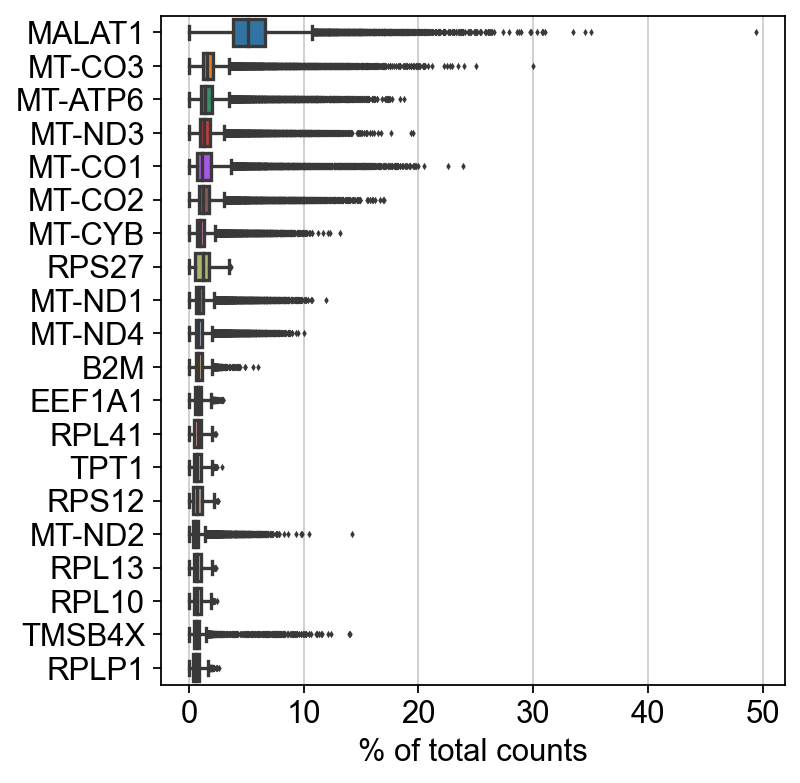

In [47]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [48]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 282 cells that have less than 100 genes expressed
filtered out 12262 genes that are detected in less than 3 cells


In [50]:
# Mithochondrial 
adata.var['mt'] = adata.var_names.str.startswith('MT-')        # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

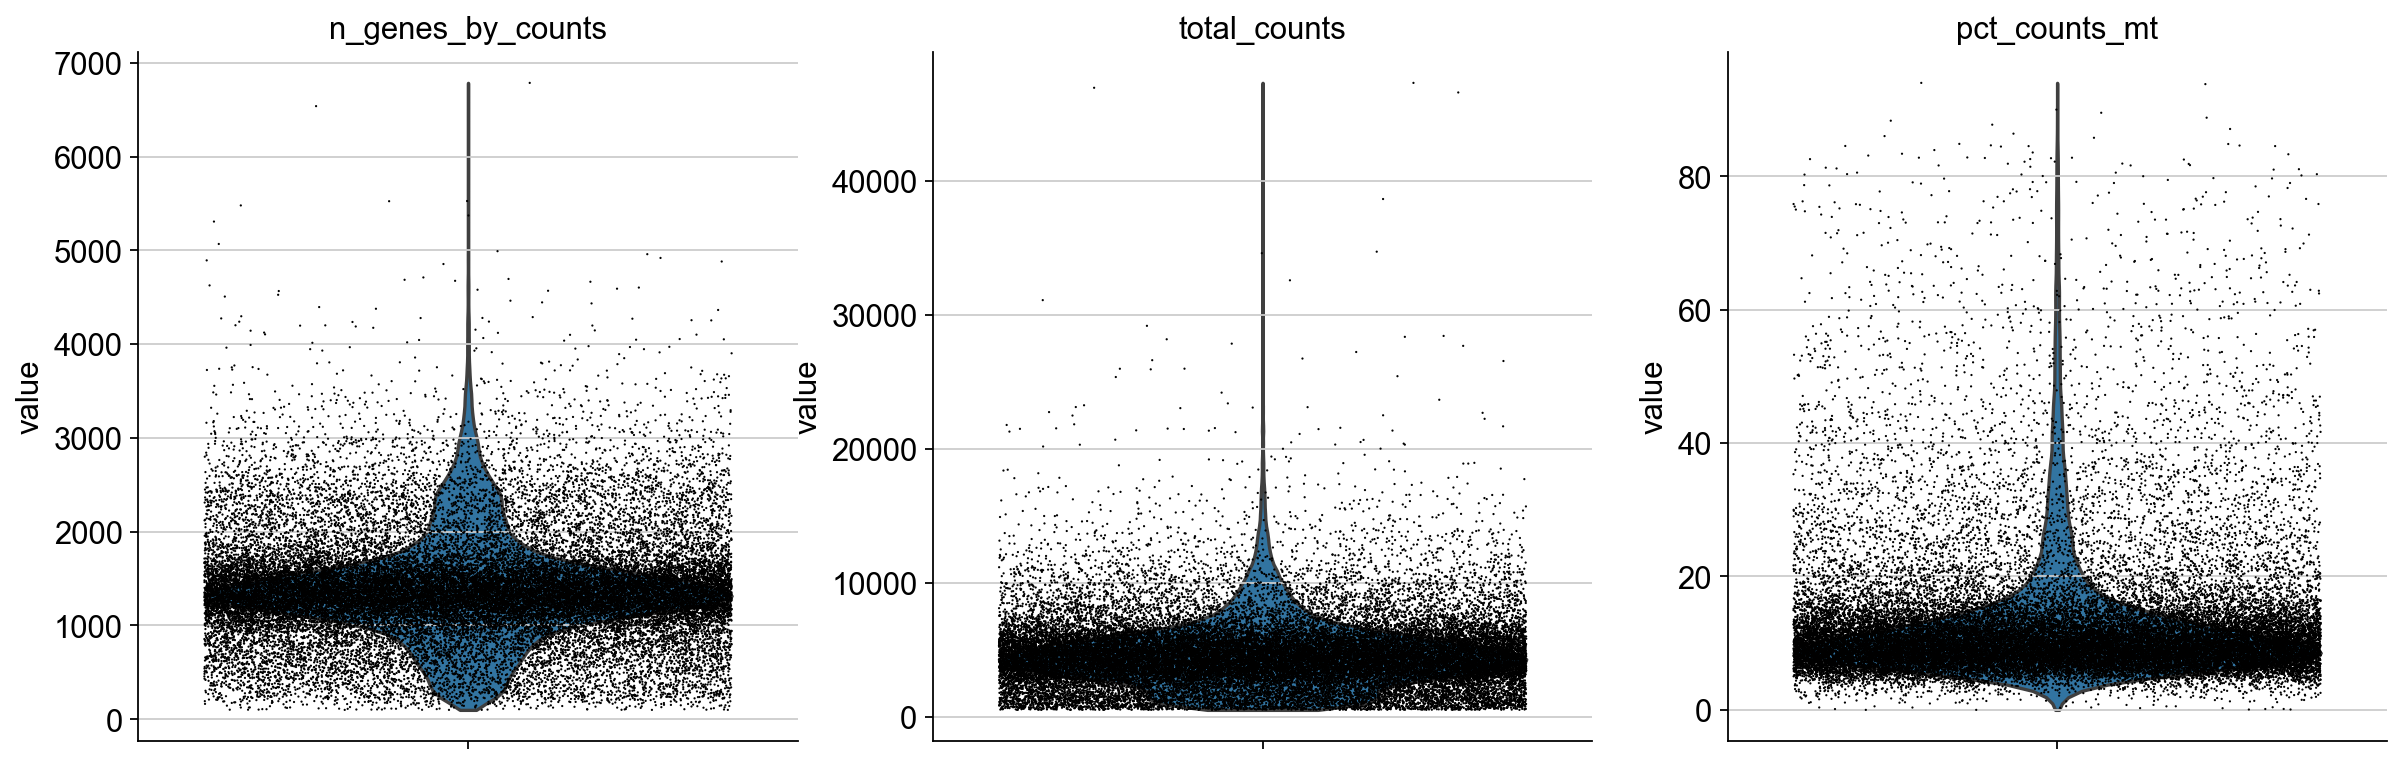

In [51]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

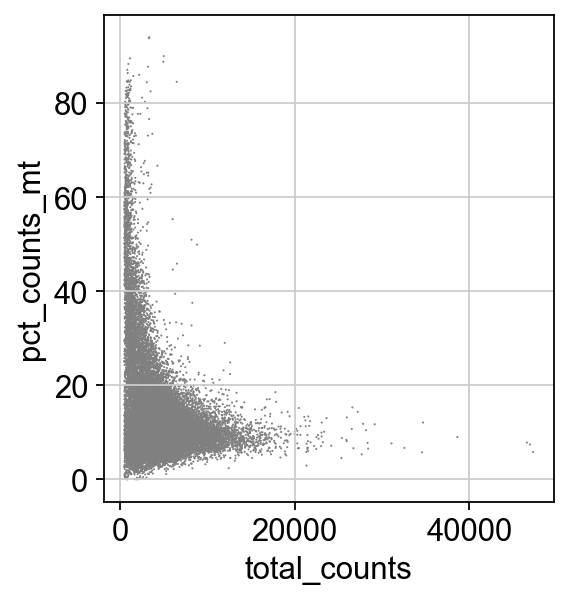

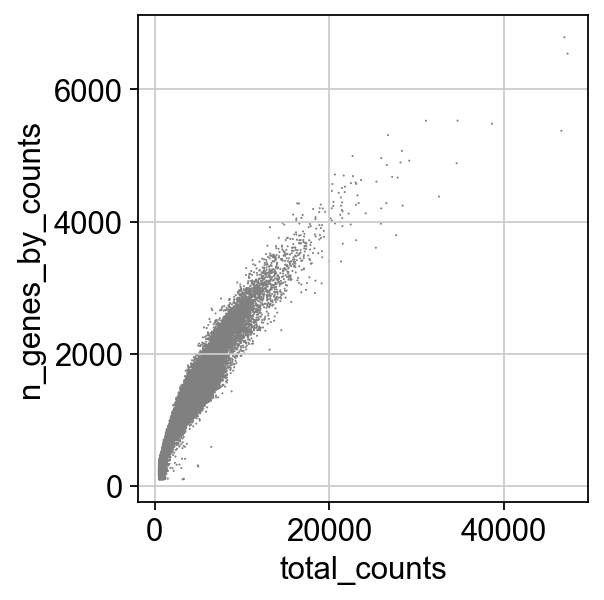

In [52]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [53]:
# Remove cells that have too many mitochondrial genes expressed or too many total counts:
adata = adata[adata.obs.n_genes_by_counts < 4000, :]
adata = adata[adata.obs.pct_counts_mt < 50, :]

In [54]:
sc.pp.normalize_total(adata, target_sum=1e4)

/Users/mmm/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)


In [55]:
sc.pp.log1p(adata)

In [56]:
# highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


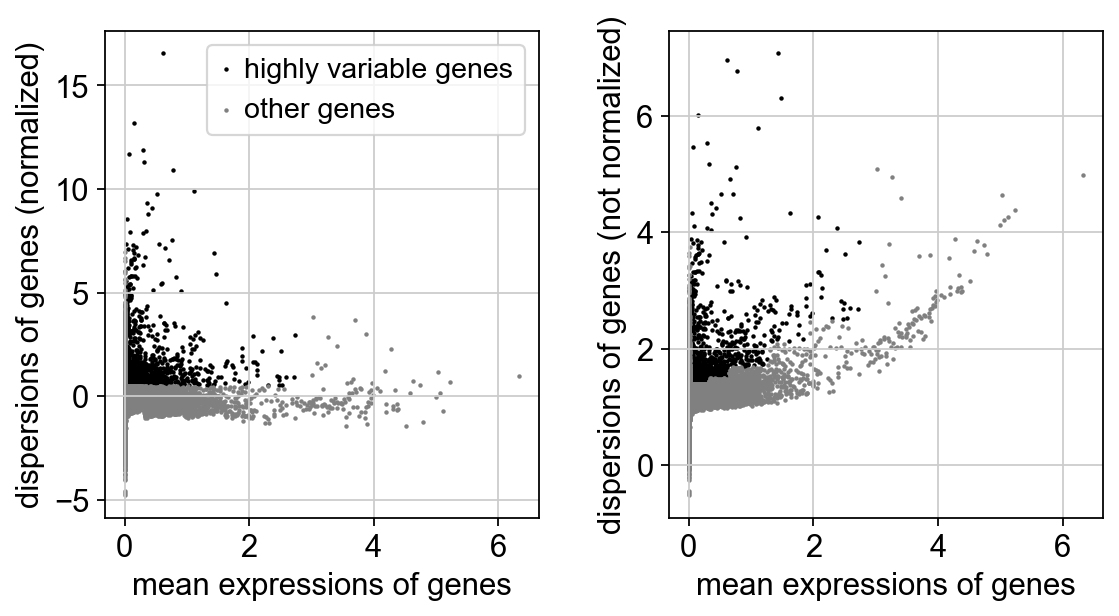

In [57]:
sc.pl.highly_variable_genes(adata)

In [58]:
adata.raw = adata

#### Not done
If you don’t proceed below with correcting the data with sc.pp.regress_out and scaling it via sc.pp.scale, you can also get away without using .raw at all.

The result of the previous highly-variable-genes detection is stored as an annotation in .var.highly_variable and auto-detected by PCA and hence, sc.pp.neighbors and subsequent manifold/graph tools. In that case, the step actually do the filtering below is unnecessary, too.

Actually do the filtering

`adata = adata[:, adata.var.highly_variable]`

Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed. Scale the data to unit variance.

`sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])`

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:06)

Scale each gene to unit variance. Clip values exceeding standard deviation 10.

`sc.pp.scale(adata, max_value=10)`


## Principal component analysis

In [61]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


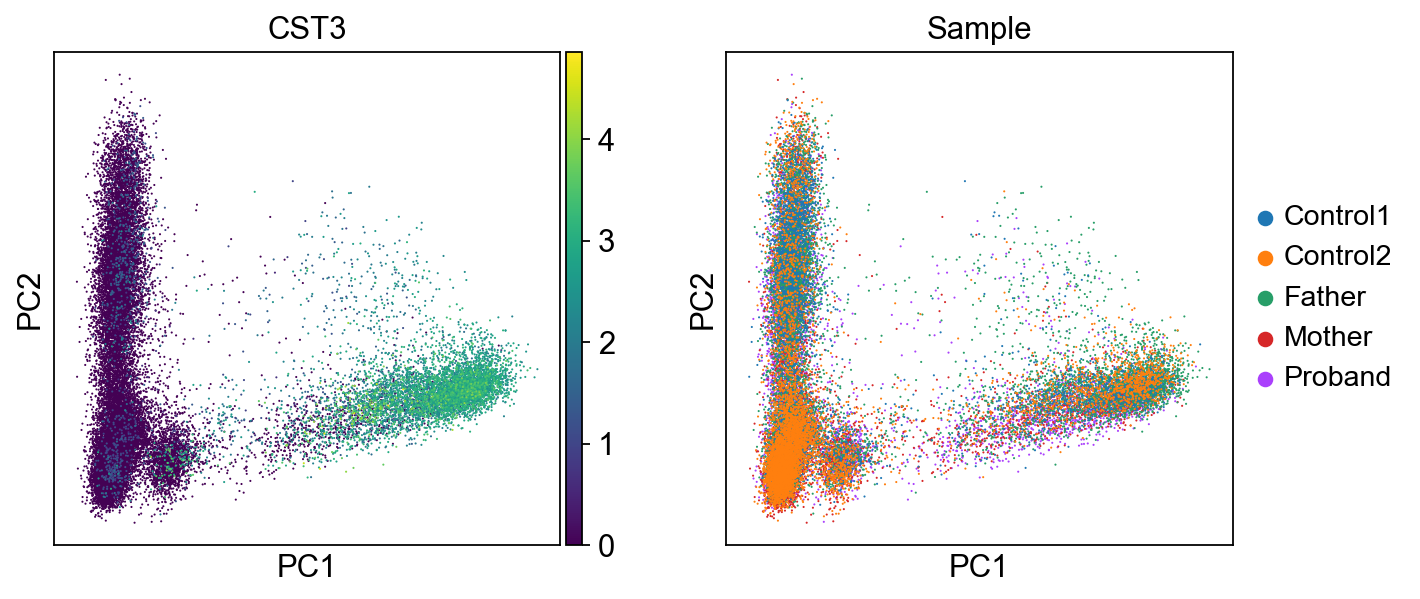

In [75]:
sc.pl.pca(adata, color=['CST3', 'Sample'])

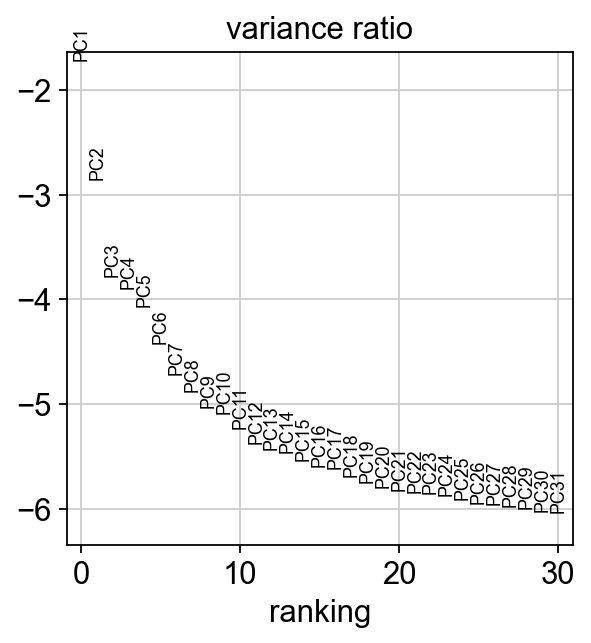

In [63]:
sc.pl.pca_variance_ratio(adata, log=True)

In [64]:
# Save the .h5ad file
P = "/Users/mmm/BioPROJECTS/MAD1 & MVA/scRNAseq PBMCs/data/"
adata.write(P + "210818_MAD1_PBMCs.h5ad")

### UMAP

In [65]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:12)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


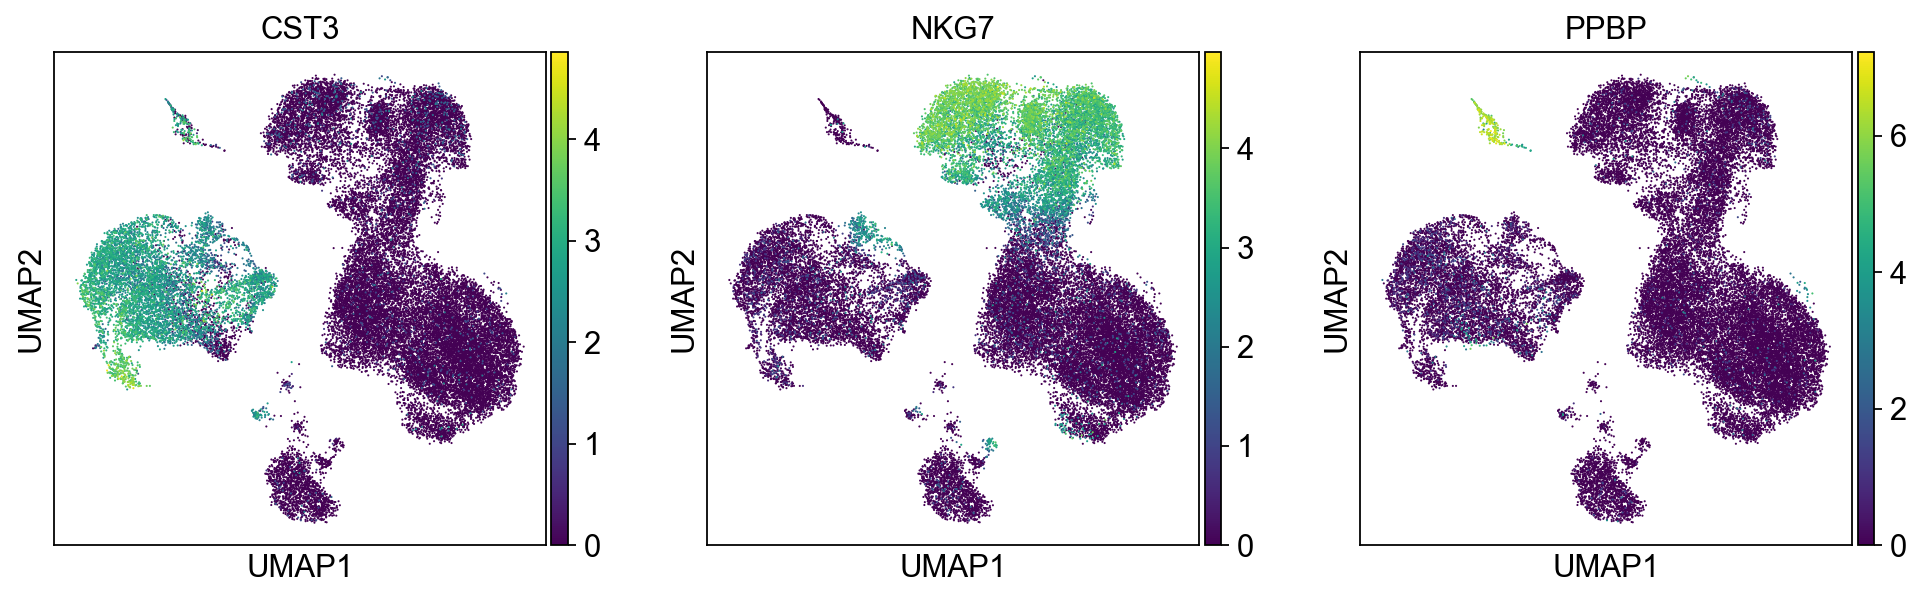

In [66]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])

### Clustering the neighborhood graph

running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)


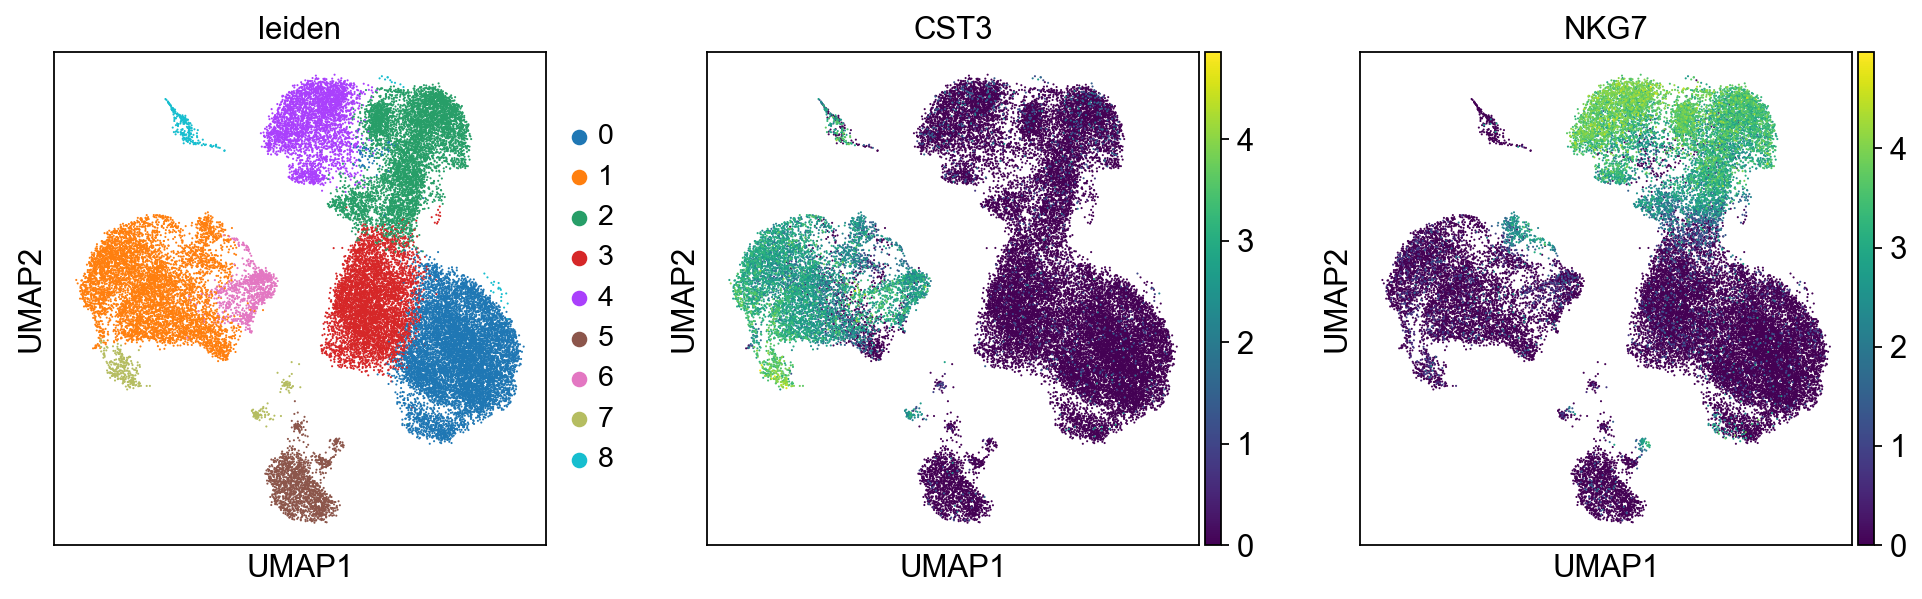

In [70]:
sc.tl.leiden(adata, resolution=0.3)
sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])

In [71]:
# Save the .h5ad file
P = "/Users/mmm/BioPROJECTS/MAD1 & MVA/scRNAseq PBMCs/data/"
adata.write(P + "210818_MAD1_PBMCs.h5ad")

In [91]:
adata

AnnData object with n_obs × n_vars = 33604 × 24339
    obs: 'Sample', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [92]:
adata.write_csvs(P + "210818_MAD1_PBMCs")

writing .csv files to /Users/mmm/BioPROJECTS/MAD1 & MVA/scRNAseq PBMCs/data/210818_MAD1_PBMCs


In [93]:
adata.obs.Sample.value_counts()

Father      9046
Control2    7410
Proband     6524
Mother      6102
Control1    4522
Name: Sample, dtype: int64

- 33604 cells
    - Proband:     6524
    - Mother:      6102
    - Father:      9046
    - Control1:    4522    
    - Control2:    7410
- 24339 genes

## Batch effect correction
Check whether it is really needed!!!

In [90]:
adata = sc.read_h5ad("/Users/mmm/BioPROJECTS/MAD1 & MVA/scRNAseq PBMCs/data/210818_MAD1_PBMCs.h5ad")

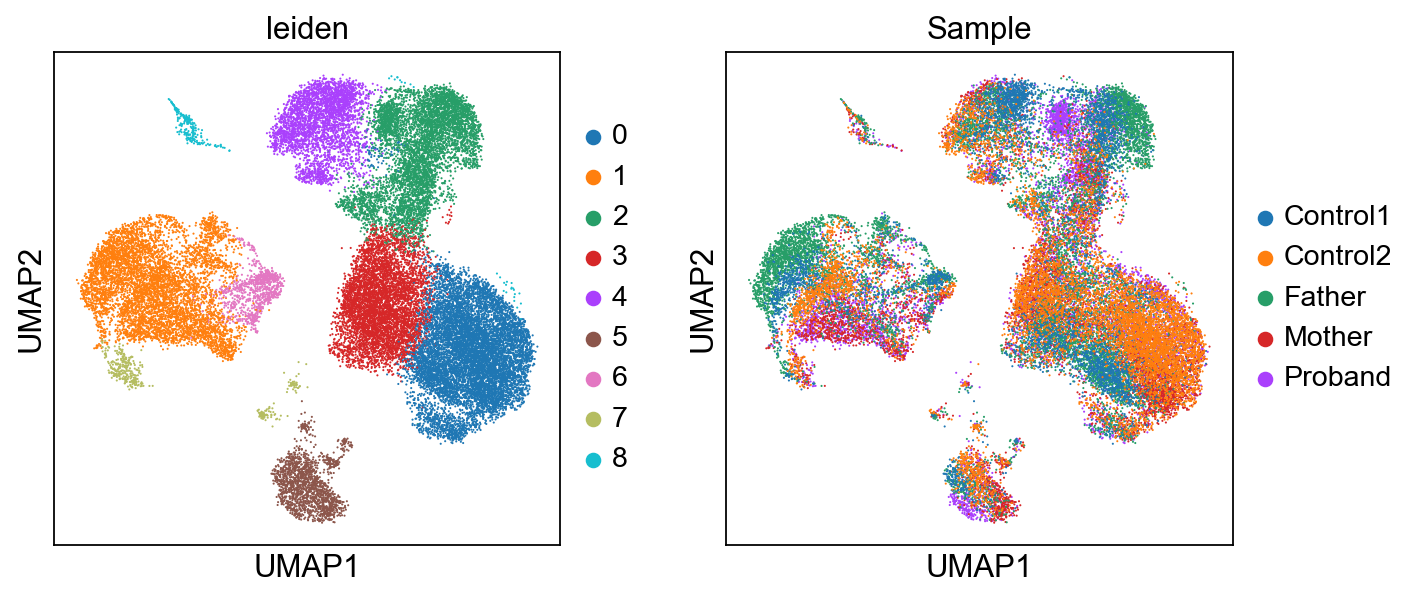

In [83]:
sc.pl.umap(adata, color=['leiden', 'Sample'])

#### Possibilities: 
`sc.pp.regress_out()`, `sc.pp.combat()`, Scanorama (`scanorama.correct`), MNN_Correct (`sc.external.pp.mnn_correc`)
#### Use sc.pp.combat()
- Comparison of batch correction methods in Scanpy: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7338326/

In [84]:
sc.pp.regress_out(adata, keys="batch")            # default in sc.pp.combat key="batch"

regressing out batch
    sparse input is densified and may lead to high memory use
    finished (0:11:35)


In [85]:
sc.pp.scale(adata, max_value=10)

### PCA and UMAP

In [86]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:06)


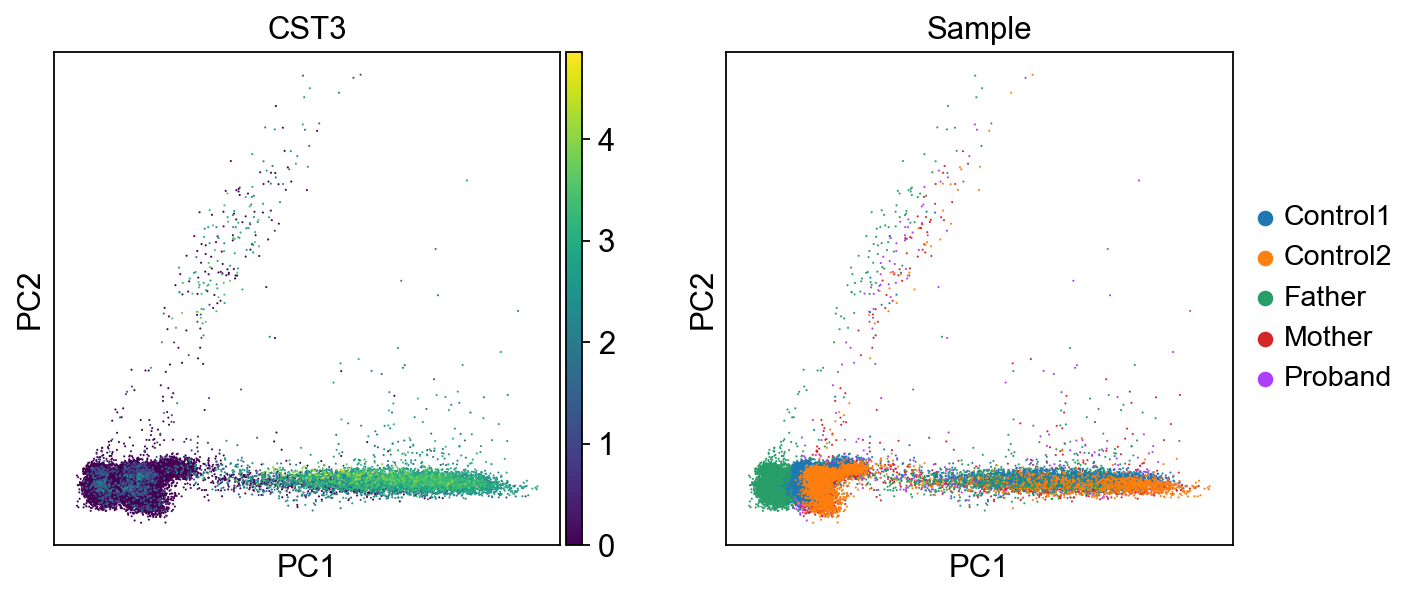

In [87]:
sc.pl.pca(adata, color=['CST3', 'Sample'])

In [88]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


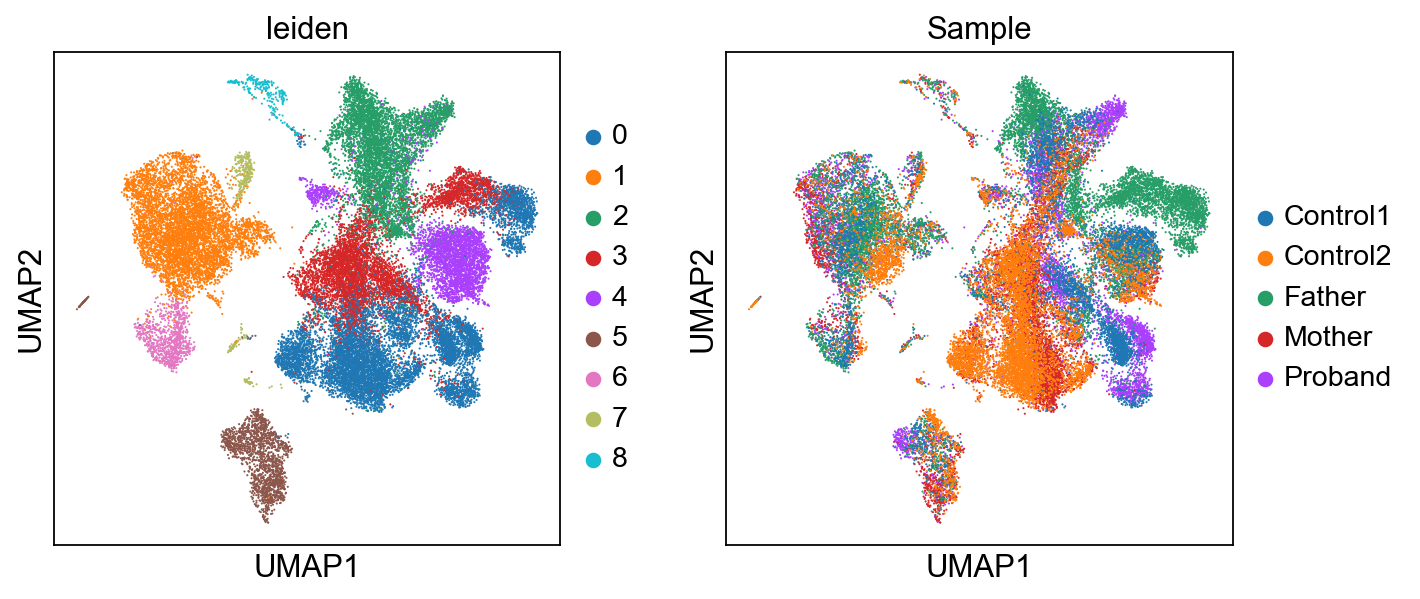

In [89]:
sc.pl.umap(adata, color=['leiden', 'Sample'])